In [2]:
pip install ultralytics opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=ee4e2f15c051412832202f650ff07246e345a9fe2917d7f50040a8ba319d1867
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
from ultralytics import YOLO
from deepface import DeepFace


25-02-01 06:21:26 - Directory /root/.deepface has been created
25-02-01 06:21:26 - Directory /root/.deepface/weights has been created


In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


### Images

In [ ]:

# model
model = YOLO('yolov8n.pt')

# test image
image_path = "/content/drive/MyDrive/Ai_Lab/data/akhavan/simple/51251001.jpg"
image = cv2.imread(image_path)

# Detect objects in the image
results = model(image)

# train images
known_faces = {
    "yazdanian": "/content/drive/MyDrive/Ai_Lab/data/Yazdanian/simple/51101028.JPG",
    "akhavan": "/content/drive/MyDrive/Ai_Lab/data/akhavan/simple/51251038.png",
}

### run

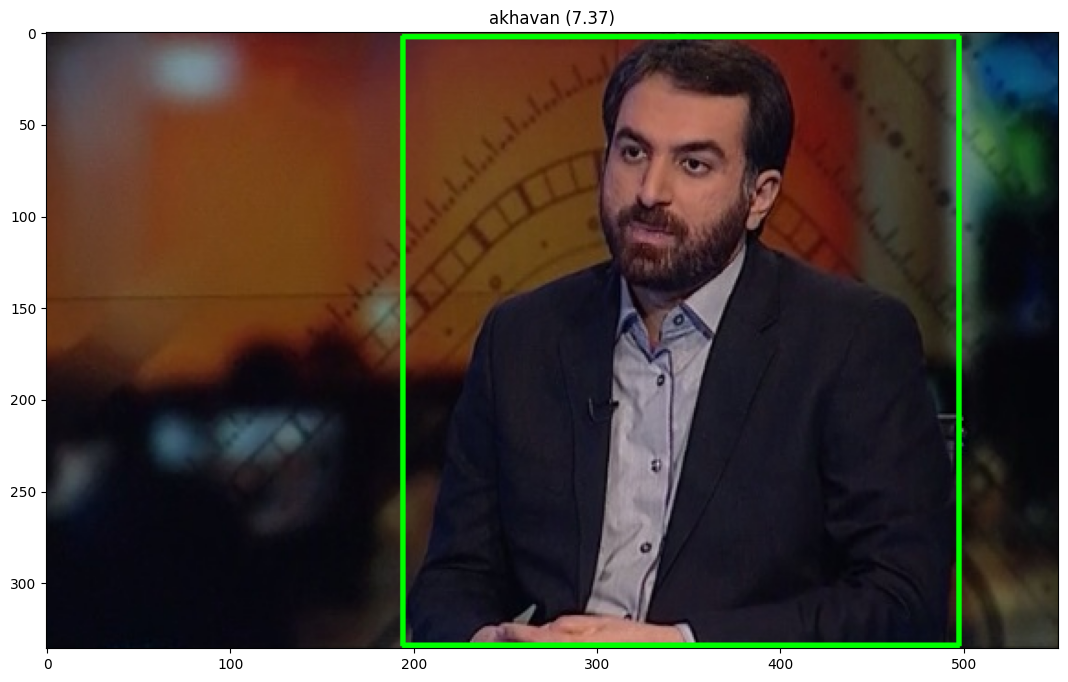

In [12]:
# Extracting features of known faces
known_face_encodings = {}
for name, path in known_faces.items():
    known_face_encodings[name] = DeepFace.represent(img_path=path, model_name="Facenet")[0]["embedding"]

# Face recognition and identity recognition
for result in results:
    for box in result.boxes:
        if box.cls == 0:  # Class 0 is for humans
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Rectangular coordinates
            face = image[y1:y2, x1:x2]  # Cut out face from image

            # Facial feature extraction
            face_encoding = DeepFace.represent(face, model_name="Facenet")[0]["embedding"]

            # Comparison with well-known figures
            best_match_name = "Unknown"
            best_match_distance = float('inf')

            for name, known_encoding in known_face_encodings.items():
                distance = np.linalg.norm(np.array(face_encoding) - np.array(known_encoding))
                if distance < best_match_distance:
                    best_match_distance = distance
                    best_match_name = name

            # Draw a rectangle and display the name
            label = f"{best_match_name} ({best_match_distance:.2f})"
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
#images show
plt.figure(figsize=[24,8])
plt.subplot(1,1,1);plt.imshow(image[...,::-1]);plt.title(label);